In [1]:
# Import packages
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
import calendar
from PIL import Image 
import numpy as np

import folium 
from folium import plugins 

init_notebook_mode(connected=True)
punc = string.punctuation
from datetime import datetime

In [2]:
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
df.tail()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0
239676,1081940,2018-03-31,Maine,Norridgewock,434 Skowhegan Rd,2,0,http://www.gunviolencearchive.org/incident/108...,https://www.centralmaine.com/2018/03/31/police...,False,...,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,https://www.centralmaine.com/2018/03/31/police...,111.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

In [5]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [6]:
df.shape

(239677, 29)

### Exploratory Data Analysis

In [7]:
print(df['n_killed'].value_counts(dropna =  True))  # if there are nan values, they're NOT counted
print(df['n_injured'].value_counts(dropna =  True))

0     185835
1      48436
2       4604
3        595
4        139
5         41
6         11
8          5
9          3
7          2
50         1
27         1
17         1
16         1
11         1
10         1
Name: n_killed, dtype: int64
0     142487
1      81986
2      11484
3       2513
4        760
5        241
6         91
7         51
8         19
9         12
10         6
12         5
11         4
14         3
19         3
13         2
15         2
16         2
17         2
25         1
18         1
20         1
53         1
Name: n_injured, dtype: int64


In [8]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [9]:
states = df['state'].unique()
states

array(['Pennsylvania', 'California', 'Ohio', 'Colorado', 'North Carolina',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Maryland', 'Tennessee',
       'Missouri', 'District of Columbia', 'Illinois', 'Delaware', 'Utah',
       'Michigan', 'Georgia', 'Indiana', 'Mississippi', 'New York',
       'Florida', 'Washington', 'South Carolina', 'Arizona', 'Kentucky',
       'New Jersey', 'Virginia', 'Wisconsin', 'Rhode Island', 'Texas',
       'Alabama', 'Kansas', 'Connecticut', 'West Virginia', 'Minnesota',
       'Nevada', 'Nebraska', 'Massachusetts', 'Hawaii', 'New Hampshire',
       'Iowa', 'Alaska', 'Arkansas', 'Idaho', 'Oregon', 'Wyoming',
       'Maine', 'North Dakota', 'Montana', 'Vermont', 'South Dakota'],
      dtype=object)

In [10]:
df.isnull()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [11]:
df['state'].value_counts()

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

In [12]:
df.count()

incident_id                    239677
date                           239677
state                          239677
city_or_county                 239677
address                        223180
n_killed                       239677
n_injured                      239677
incident_url                   239677
source_url                     239209
incident_url_fields_missing    239677
congressional_district         227733
gun_stolen                     140179
gun_type                       140226
incident_characteristics       239351
latitude                       231754
location_description            42089
longitude                      231754
n_guns_involved                140226
notes                          158660
participant_age                147379
participant_age_group          197558
participant_gender             203315
participant_name               117424
participant_relationship        15774
participant_status             212051
participant_type               214814
sources     

In [13]:
df.drop([
    "incident_id",
    "incident_url",
    "sources",
    "source_url",
    "incident_url_fields_missing",
    "location_description",
    "participant_relationship"], axis=1, inplace=True)

# Converting object datatype to datetime
# To create column-day,month,year,weekday ,week and quarter.

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['loss'] = df['n_killed'] + df['n_injured']

df.head()

,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,participant_name,participant_status,participant_type,state_house_district,state_senate_district,year,month,monthday,weekday,loss
0,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,...,0::Julian Sims,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,2013,1,1,1,4
1,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Bernard Gillis,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,2013,1,1,1,4
2,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,2013,1,1,1,4
3,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",...,0::Stacie Philbrook||1::Christopher Ratliffe||...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,2013,1,5,5,4
4,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Danielle Imani Jameison||1::Maurice Eugene ...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,2013,1,7,0,4


In [14]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018])

In [15]:
aggregated = df['year'].value_counts()    # missing data in years 2013 and 2018
aggregated

2017    61401
2016    58763
2015    53579
2014    51854
2018    13802
2013      278
Name: year, dtype: int64

In [16]:
df = df.set_index('year')
df = df.drop(2013, axis=0)
df = df.drop(2018, axis=0)
#df = df.drop(date(2018, 1, 1): date(2018, 12, 31), axis=0)
df.reset_index(inplace = True)
df

,year,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_gender,participant_name,participant_status,participant_type,state_house_district,state_senate_district,month,monthday,weekday,loss
0,2014,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,2.0,NaN,NaN,...,0::Female,NaN,0::Unharmed,0::Victim,92.0,34.0,1,1,2,0
1,2014,2014-01-01,New Jersey,Newark,Central Avenue,0,0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,29.0,29.0,1,1,2,0
2,2014,2014-01-01,New York,Queens,113th Avenue,1,0,5.0,NaN,NaN,...,0::Male||1::Male,0::Julio Mora||1::Sheldon Smith,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,33.0,14.0,1,1,2,1
3,2014,2014-01-01,New York,Brooklyn,St. Johns Place,0,1,9.0,NaN,NaN,...,0::Male||1::Male,NaN,0::Injured,0::Victim||1::Subject-Suspect,43.0,20.0,1,1,2,1
4,2014,2014-01-01,Missouri,Springfield,Beverly Hills and Temple,0,1,7.0,NaN,NaN,...,0::Female,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,131.0,30.0,1,1,2,1
5,2014,2014-01-01,Georgia,Columbus,1327 23rd Street,0,1,2.0,NaN,NaN,...,0::Male||1::Male,1::Jakevious Corderro Luckey,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,135.0,15.0,1,1,2,1
6,2014,2014-01-01,New York,Syracuse,200 block of Ballard Avenue,0,1,24.0,NaN,NaN,...,0::Male,0::Shaquille Breland,0::Injured,0::Victim,128.0,53.0,1,1,2,1
7,2014,2014-01-01,Kentucky,Lexington,Kenton and Fourth streets,0,0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,0
8,2014,2014-01-01,Georgia,Bibb County,NaN,0,1,2.0,NaN,NaN,...,0::Male||1::Male,0::Bryan Collins||1::Savalles Emory,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,142.0,26.0,1,1,2,1
9,2014,2014-01-01,Virginia,Prince William County,10100 block of Shiloh Ct,0,1,1.0,NaN,NaN,...,0::Male||1::Male,1::David Jamar Moore,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,50.0,29.0,1,1,2,1


In [17]:
aggregated = df['year'].value_counts()
aggregated

2017    61401
2016    58763
2015    53579
2014    51854
Name: year, dtype: int64

In [18]:
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('year')
x1 = x1[:]
y1 = y1[:]
trace1 = go.Bar(x=x1, y=y1, opacity=.8, name="year count", marker=dict(color=['rgba(201, 150, 200, 0.6)', 'rgba(201, 150, 200, 0.6)', 'rgba(201, 150, 200, 0.6)', 'rgba(201, 150, 200, 0.6)']))
layout = dict(height=600, title='Total Gun Violence Incidents by year', legend=dict(orientation="h"))
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [19]:
aggregated = df['month'].value_counts()
aggregated

7     21092
8     21012
5     19903
10    19868
9     19628
6     18724
4     18611
1     18150
12    18084
11    17951
3     17869
2     14705
Name: month, dtype: int64

In [20]:
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('month')
x1 = x1[:]
y1 = y1[:]
trace1 = go.Bar(x=x1, y=y1, opacity=.8, name="month count", marker=dict(color=['rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)',
                                                                               'rgba(250, 150, 150, 0.6)']))
layout = dict(height=700, title='Gun Violence Incidents by month', legend=dict(orientation="h"))
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [21]:
aggregated = df['weekday'].value_counts()
aggregated

6    35041
5    33985
2    32108
0    31674
1    31381
4    30867
3    30541
Name: weekday, dtype: int64

In [22]:
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('weekday')
x1 = x1[:]
y1 = y1[:]
trace1 = go.Bar(x=x1, y=y1, opacity=.8, name="weekday count", marker=dict(color=['rgba(107, 184, 251, 0.6)',
                                                                               'rgba(107, 184, 251, 0.6)',
                                                                               'rgba(107, 184, 251, 0.6)',
                                                                               'rgba(107, 184, 251, 0.6)',
                                                                               'rgba(107, 184, 251, 0.6)',
                                                                               'rgba(107, 184, 251, 0.6)',
                                                                               'rgba(107, 184, 251, 0.6)']))
layout = dict(height=700, title='Gun Violence Incidents by weekdays', legend=dict(orientation="h"))
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [23]:
aggregated = df['monthday'].value_counts()
aggregated

1     7985
19    7585
25    7553
27    7552
20    7534
5     7515
26    7502
13    7499
17    7476
4     7438
28    7416
15    7413
18    7401
16    7389
23    7378
8     7370
11    7345
12    7343
6     7280
9     7271
3     7271
21    7262
22    7256
7     7233
2     7206
14    7174
24    7169
29    7136
10    7114
30    6985
31    4546
Name: monthday, dtype: int64

In [24]:
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('monthday')
x1 = x1[:]
y1 = y1[:]
trace1 = go.Bar(x=x1, y=y1, opacity=.8, name="monthday count", marker=dict(color=['rgba(77, 197, 168, 0.6)',
                                                                               'rgba(77, 197, 168, 0.6)',
                                                                               'rgba(77, 197, 168, 0.6)',
                                                                               'rgba(77, 197, 168, 0.6)',
                                                                               'rgba(77, 197, 168, 0.6)',
                                                                               'rgba(77, 197, 168, 0.6)',
                                                                               'rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)',
                                                                               'rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)','rgba(77, 197, 168, 0.6)']))
layout = dict(height=700, title='Gun Violence Incidents by monthdays', legend=dict(orientation="h"))
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [25]:
# 2014 time series
temp = df[df['year'] == 2014].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2014', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)



# 2015 time series
temp = df[df['year'] == 2015].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2015', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)





# 2016 time series
temp = df[df['year'] == 2016].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2016', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)


# 2017 time series
temp = df[df['year'] == 2017].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2017', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)

In [26]:
from datetime import date
import holidays

In [27]:
us_holidays = []
for date, name in sorted(holidays.US(state=None, years=2014).items()):
    us_holidays.append(date)
    print(date, name)
for date, name in sorted(holidays.US(state=None, years=2015).items()):
    us_holidays.append(date)
    print(date, name)
for date, name in sorted(holidays.US(state=None, years=2016).items()):
    us_holidays.append(date)
    print(date, name)
for date, name in sorted(holidays.US(state=None, years=2017).items()):
    us_holidays.append(date)
    print(date, name)

2014-01-01 New Year's Day
2014-01-20 Martin Luther King, Jr. Day
2014-02-17 Washington's Birthday
2014-05-26 Memorial Day
2014-07-04 Independence Day
2014-09-01 Labor Day
2014-10-13 Columbus Day
2014-11-11 Veterans Day
2014-11-27 Thanksgiving
2014-12-25 Christmas Day
2015-01-01 New Year's Day
2015-01-19 Martin Luther King, Jr. Day
2015-02-16 Washington's Birthday
2015-05-25 Memorial Day
2015-07-03 Independence Day (Observed)
2015-07-04 Independence Day
2015-09-07 Labor Day
2015-10-12 Columbus Day
2015-11-11 Veterans Day
2015-11-26 Thanksgiving
2015-12-25 Christmas Day
2016-01-01 New Year's Day
2016-01-18 Martin Luther King, Jr. Day
2016-02-15 Washington's Birthday
2016-05-30 Memorial Day
2016-07-04 Independence Day
2016-09-05 Labor Day
2016-10-10 Columbus Day
2016-11-11 Veterans Day
2016-11-24 Thanksgiving
2016-12-25 Christmas Day
2016-12-26 Christmas Day (Observed)
2017-01-01 New Year's Day
2017-01-02 New Year's Day (Observed)
2017-01-16 Martin Luther King, Jr. Day
2017-02-20 Washingt

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225597 entries, 0 to 225596
Data columns (total 27 columns):
year                        225597 non-null int64
date                        225597 non-null datetime64[ns]
state                       225597 non-null object
city_or_county              225597 non-null object
address                     209691 non-null object
n_killed                    225597 non-null int64
n_injured                   225597 non-null int64
congressional_district      217102 non-null float64
gun_stolen                  126304 non-null object
gun_type                    126333 non-null object
incident_characteristics    225285 non-null object
latitude                    219257 non-null float64
longitude                   219257 non-null float64
n_guns_involved             126333 non-null float64
notes                       149920 non-null object
participant_age             138644 non-null object
participant_age_group       186339 non-null object
participant_g

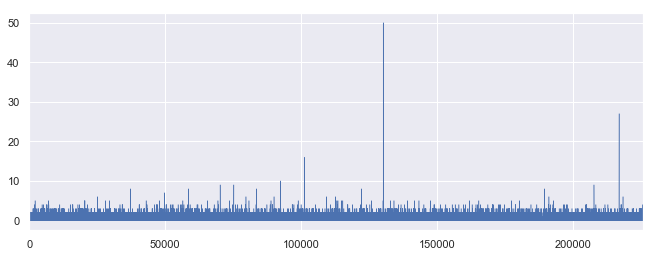

In [51]:
sns.set(rc={'figure.figsize':(11, 4)})
df['n_killed'].plot(linewidth=0.5)

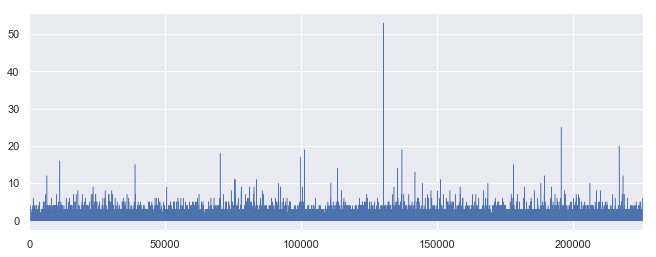

In [52]:
sns.set(rc={'figure.figsize':(11, 4)})
df['n_injured'].plot(linewidth=0.5)

### 10 highest loss Gun Violence Incidents

In [53]:
df1 = df.sort_values(['loss'], ascending=[False])
df1[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

,date,state,city_or_county,address,n_killed,n_injured
130170,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53
216873,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20
101253,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19
70233,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18
195567,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25
137050,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19
11288,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
92346,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9
113323,2016-02-25,Kansas,Hesston,200 S Ridge Rd,4,14
218302,2017-11-14,California,Corning,17357 Stagecoach Rd,6,12


In [55]:
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]


def returnsize(x):
    if x > 200:
        return 60
    elif x > 80:
        return 40
    elif x > 30:
        return 25
    elif x > 10:
        return 15
    elif x > 5: 
        return 10
    else:
        return 5

df1['size'] = df1['loss'].apply(lambda x: returnsize(x))
dfs = df1.head(50)

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = dfs['longitude'],
        lat = dfs['latitude'],
        text = dfs['city_or_county'],
        mode = 'markers',
        marker = dict(
            size = dfs['size'],
            opacity = 0.5,
            cmin = 0,
        ))]

layout = dict(
        title = 'Most Serious Gun Violence Incidents in US',
        colorbar = True,
        geo = dict(
            projection=dict( type='albers usa' ),
            subunitcolor = "rgb(221, 221, 221)",
            subunitwidth = 1.0
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False)

In [59]:
# Age of Gun Violence Suspects

def get_user_mapping(txt):
    if txt == "NA":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

df['participant_type'] = df['participant_type'].fillna("NA")
df['participant_type_map'] = df['participant_type'].apply(lambda x : get_user_mapping(x))
df['participant_age'] = df['participant_age'].fillna("NA")
df['participant_age_map'] = df['participant_age'].apply(lambda x : get_user_mapping(x))
df['participant_gender'] = df['participant_gender'].fillna("NA")
df['participant_gender_map'] = df['participant_gender'].apply(lambda x : get_user_mapping(x))

## Finding the Suspect Age Groups
suspect_age_groups = {}
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_age_map']:
            ag = row['participant_age_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1

trace1 = go.Bar(x=list(suspect_age_groups.keys()), y=list(suspect_age_groups.values()), opacity=0.75, name="month", marker=dict(color='rgba(88, 114, 251, 0.6)'))
layout = dict(height=400, title='Suspects Age - Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [63]:
victim_age_groups = {}
for i, row in df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
trace1 = go.Bar(x=list(victim_age_groups.keys()), y=list(victim_age_groups.values()), opacity=0.75, name="month", marker=dict(color='thistle'))
layout = dict(height=400, title='Victims Age - Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [73]:
## find gender groups 
suspect_age_groups = {}
victim_age_groups = {}
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_gender_map']:
            ag = row['participant_gender_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1
                        
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_gender_map']:
            ag = row['participant_gender_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
del victim_age_groups['Male, female']
fig = {
  "data": [
    {
      "values": list(suspect_age_groups.values()),
      "labels": list(suspect_age_groups.keys()),
      "marker" : dict(colors=['#87CEFA','#CD5C5C']),
      "name": "Suspects",
      "domain": {"x": [0, .48]},
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
    {
      "values": list(victim_age_groups.values()),
      "labels": list(victim_age_groups.keys()),
      "text": ["Victims"],
      "marker" : dict(colors=['#CD5C5C','#87CEFA']),
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Victims",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
          "showlegend" : False,
        "title":"Genders of People Involved",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Suspects",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Victims",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')